In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\StudentsPerformance.csv")

In [3]:
print(df.columns)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
#Dataset-ում չկան null-եր

In [6]:
df.head

<bound method NDFrame.head of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none      

In [7]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [8]:
# none փոխարինենք not completed-ով

In [9]:
df['test preparation course'] = df['test preparation course'].replace('none', 'not completed')

In [10]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0           not completed          72             72             74  
1               completed          69             90             88  
2           not completed          90             95             93  
3           not completed          47             57             44  
4           not completed          76             78             75

In [11]:
df.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [12]:
# math score միջինում փոքր է reading score-ից և writing score, քանի որ կա 0 արժեք 
# Աղյուսակում ներկայացված է 3 փոփոխականների միջինը, ստանդարտ շեղում, առավելագույն և նվազագույն արժեքները


In [13]:
df.describe(include='object')

gender race/ethnicity parental level of education     lunch  \
count     1000           1000                        1000      1000   
unique       2              5                           6         2   
top     female        group C                some college  standard   
freq       518            319                         226       645   

       test preparation course  
count                     1000  
unique                       2  
top              not completed  
freq                       642

In [14]:
#

In [15]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['mean_score'] = round(df['total_score'] / 3,1)
df = df.loc[df['math score'] >30 ]
df = df.loc[df['reading score'] >30 ]



In [16]:
# Ստեղծենք նոր փոփոխականներ միջին գնահատական՝ mean_score և ընդհանուր գնահատական՝total_score
# Ունենք outlier-ներ դրա համար պայման ենք դնում

In [17]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0           not completed          72             72             74   
1               completed          69             90             88   
2           not completed          90             95             93   
3           not completed          47             57             44   
4           not completed          76             78             75   

   total_score  mean_score  
0          218        72.7  
1          247        82.3  
2          278        92.7  
3          148        49.3  
4          229        76.3

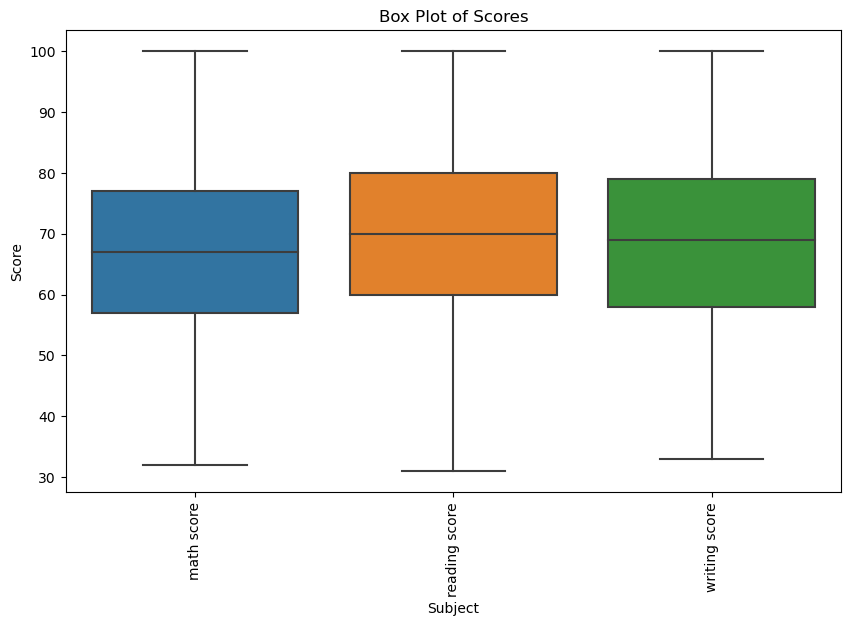

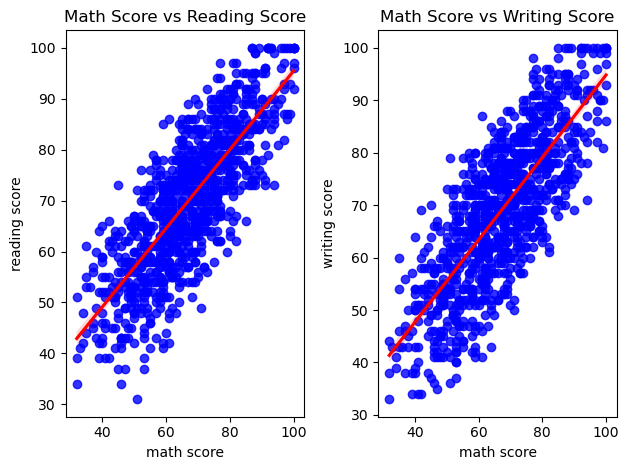

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title('Box Plot of Scores')
plt.xlabel('Subject')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()

# Create scatter plots for pairwise comparisons of scores
plt.subplot(1, 2, 1)
sns.regplot(x='math score', y='reading score', data=df, color='red', scatter_kws={'color': 'blue'})
plt.title('Math Score vs Reading Score')

# Scatter plot of Math Score vs Writing Score with line of best fit
plt.subplot(1, 2, 2)
sns.regplot(x='math score', y='writing score', data=df, color='red', scatter_kws={'color': 'blue'})
plt.title('Math Score vs Writing Score')

plt.tight_layout()
plt.show()

In [ ]:
# Ստացանք ուսանողների  միջին կարդալու գնահատականը ամենեմեծն է, մաթմատիկաի միջին գնահատականը ամենփոքրն է։
#Մաթեմատիկայի գնահատականի և կարդալու գնահատականի միջև կա գծային կախվածույուն:Մաթեմատիկայի գնահատականի և գրելու գնահատականի միջև ևս կա գծային կախվածություն

#### 1.Զրոյական վարկած։ չկա էական տարբերություն  թեստի նախապատրաստական դասընթացն ավարտած ուսանողների և չանցածների միջև:

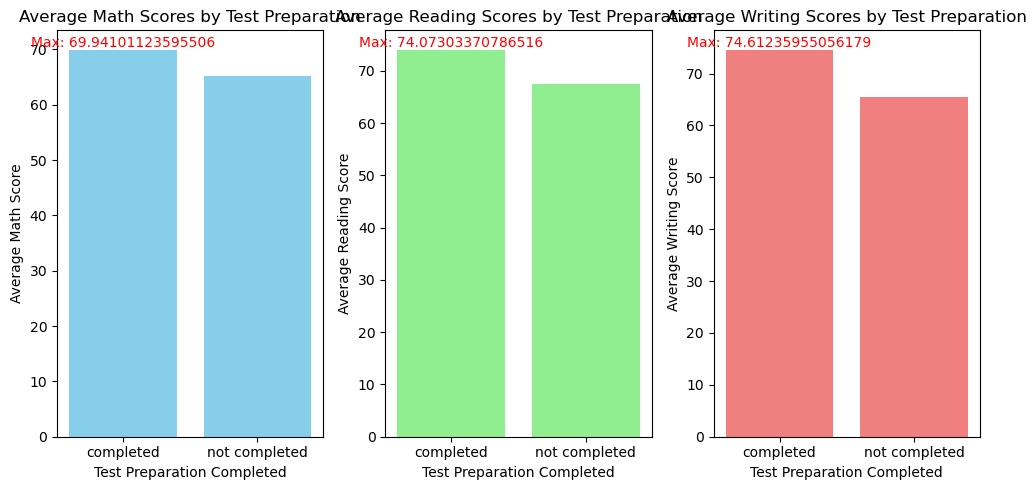

In [49]:
prep_scores = df[['math score', 'reading score', 'writing score','test preparation course']].groupby('test preparation course').agg('mean')

# Plotting bar graphs
plt.figure(figsize=(10, 5))

# Math Scores
plt.subplot(1, 3, 1)
plt.bar(prep_scores.index, prep_scores['math score'], color='skyblue')
max_math_score = prep_scores['math score'].max()
plt.text(prep_scores.index[prep_scores['math score'].argmax()], max_math_score, f'Max: {max_math_score}', ha='center', va='bottom', color='red')
plt.title('Average Math Scores by Test Preparation')
plt.xlabel('Test Preparation Completed')
plt.ylabel('Average Math Score')

# Reading Scores
plt.subplot(1, 3, 2)
plt.bar(prep_scores.index, prep_scores['reading score'], color='lightgreen')
max_reading_score = prep_scores['reading score'].max()
plt.text(prep_scores.index[prep_scores['reading score'].argmax()], max_reading_score, f'Max: {max_reading_score}', ha='center', va='bottom', color='red')
plt.title('Average Reading Scores by Test Preparation')
plt.xlabel('Test Preparation Completed')
plt.ylabel('Average Reading Score')

# Writing Scores
plt.subplot(1, 3, 3)
plt.bar(prep_scores.index, prep_scores['writing score'], color='lightcoral')
max_writing_score = prep_scores['writing score'].max()
plt.text(prep_scores.index[prep_scores['writing score'].argmax()], max_writing_score, f'Max: {max_writing_score}', ha='center', va='bottom', color='red')
plt.title('Average Writing Scores by Test Preparation')
plt.xlabel('Test Preparation Completed')
plt.ylabel('Average Writing Score')

plt.tight_layout()
plt.show()

In [ ]:
# Վարկածը մերժվում է քանի որ նախապատրաստական դասընթացը ավարտածների միջին գնահատականները բարձր են, քան չանցածներինը։

### 2.Զրոյական վարկած։ Արական և իգական սեռի ուսանողների միջև  միավորների մեջ էական տարբերություն չկա:

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


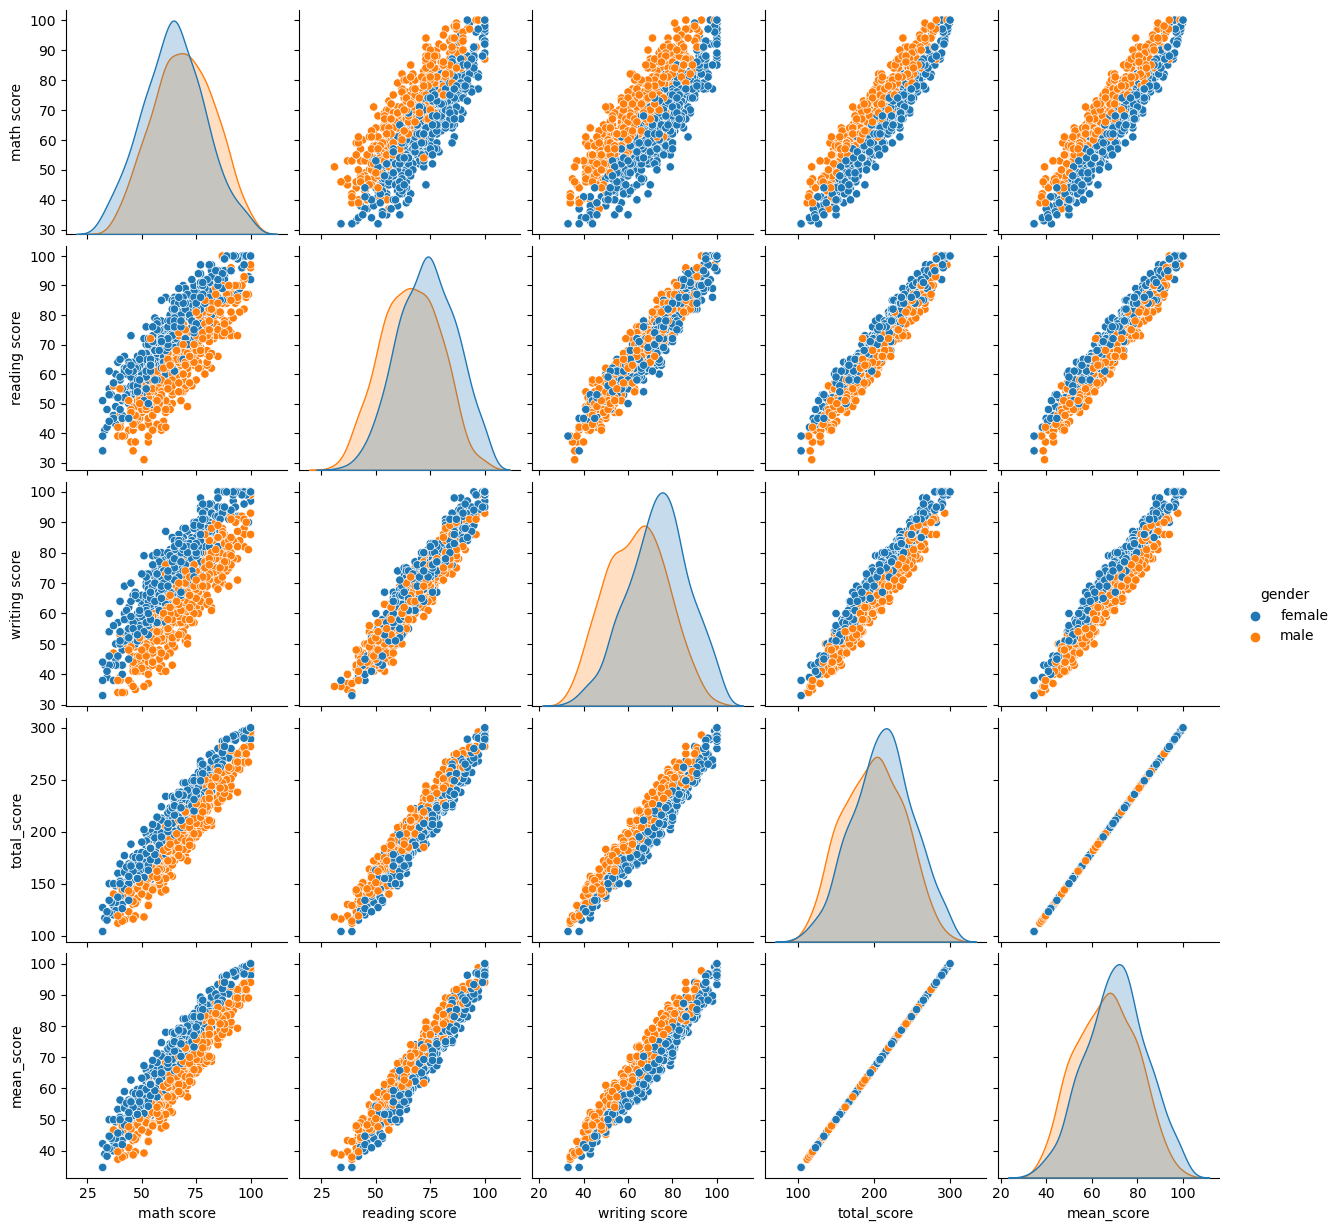

In [23]:
sns.pairplot(df,hue = 'gender')
plt.show()


In [24]:
# Անկյունագծով ցույց է տալիս, որ գնահատականները ունեն նորմալ բաշխում: Աղջիկների գնահատականներ բարձր են տղաների գնահատականներից, այսիքն աղջիկները ավելի լավ են սովորում
#Զրոյական վարկածը մերժվեց։

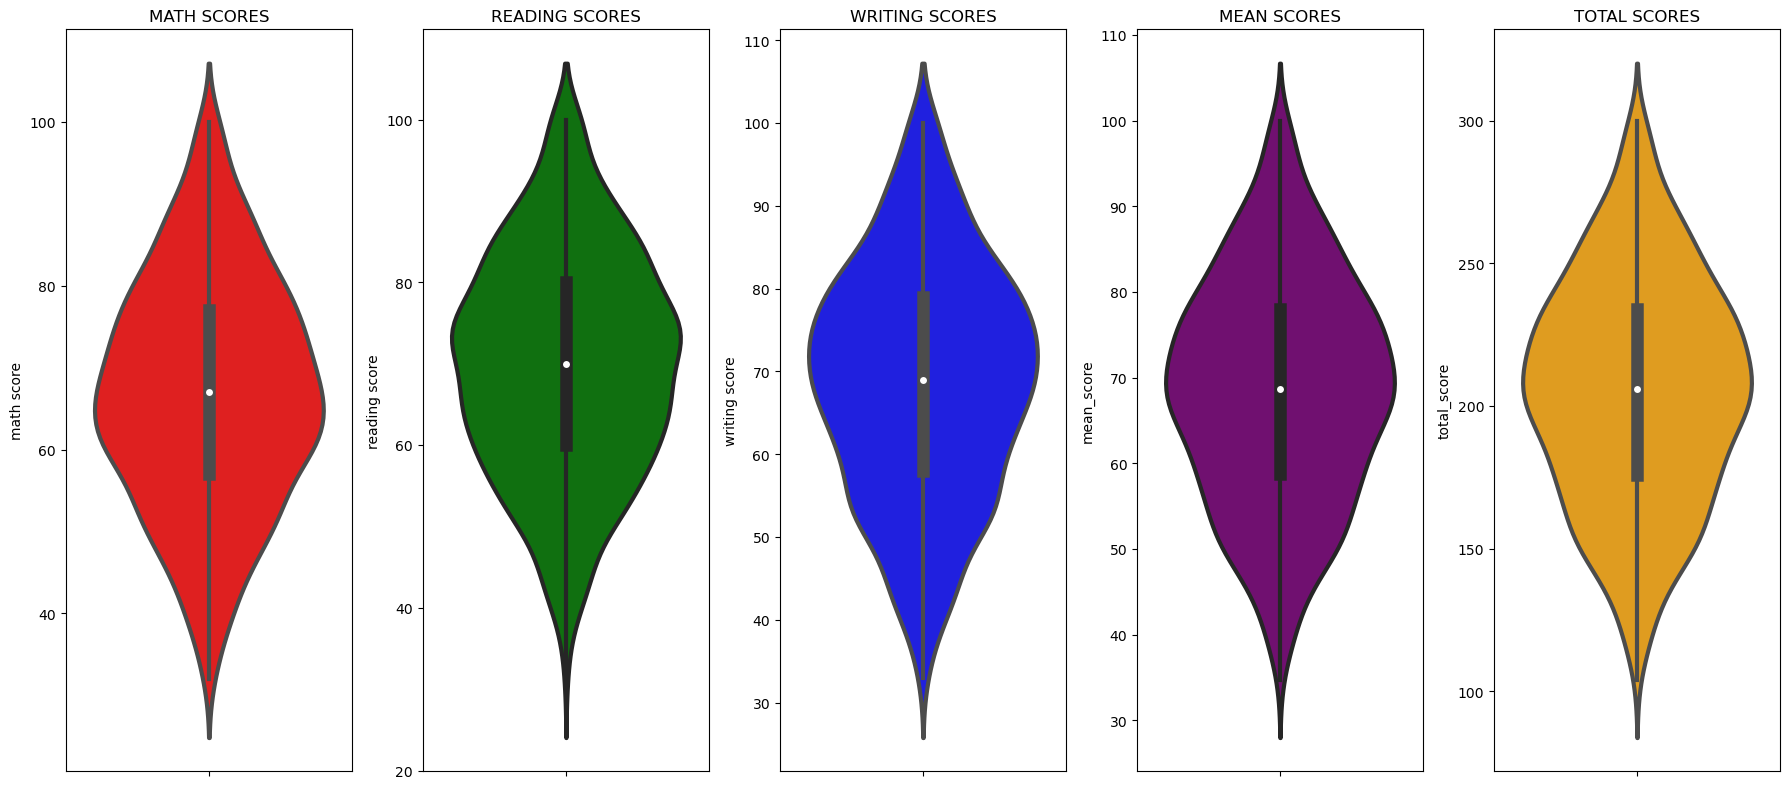

In [25]:
plt.figure(figsize=(18, 8))

# Math Scores
plt.subplot(1, 5, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score', data=df, color='red', linewidth=3)

# Reading Scores
plt.subplot(1, 5, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)

# Writing Scores
plt.subplot(1, 5, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)

# Mean Scores
plt.subplot(1, 5, 4)
plt.title('MEAN SCORES')
sns.violinplot(y='mean_score', data=df, color='purple', linewidth=3)

# Total Scores
plt.subplot(1, 5, 5)
plt.title('TOTAL SCORES')
sns.violinplot(y='total_score', data=df, color='orange', linewidth=3)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [51]:
# Յուրաքանչյուր նկարի միջի սպիտակ կետը ներկայացնում է միջինը։Յուրաքանչյուր կորի լայնությունը հաճախականությանը:

### 3 Զրոյական վարկած։ Ծնողների կրթության տարբեր մակարդակներ ունեցող ուսանողների  մեջ էական տարբերություն չկա:

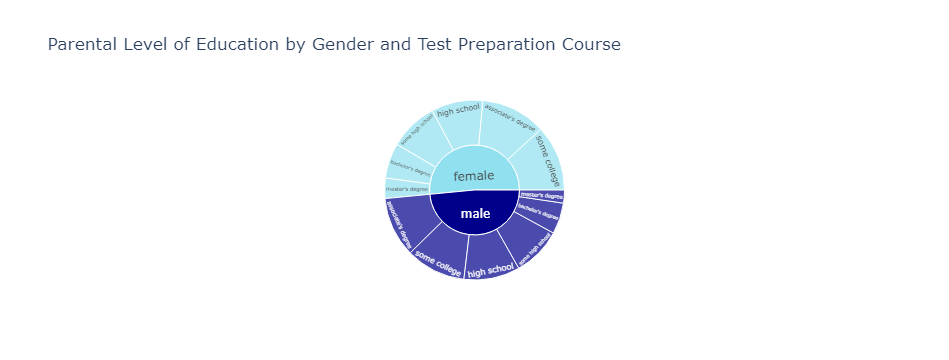

In [27]:
import plotly.express as px

# Define a dictionary to map values to colors for the sunburst chart
color_map = {
    'male': 'darkblue',     # Color for 'male' category
    'female': '#90e0ef',    # Color for 'female' category
}

# Define the title for the sunburst chart
title = 'Parental Level of Education by Gender and Test Preparation Course'

# Call the sunburst function with appropriate parameters
fig = px.sunburst(df,                                     
                  path=['gender', 'parental level of education'],  
                  color='gender',                               
                  color_discrete_map=color_map,                
                  title=title)                                 
fig.show()

In [50]:
# Գծապատկերում ներկայացվում է ծնողների կրթության մակարդակը ըստ սեռի։
# Զրոյական վարկածը մերժվում է ։Ծնողների բարձր կրթական մակարդակ ունեցող երեխաներ շատ են։ Դոցենտի կոչում ունեցող ծնողի 106 տղա և 115 աղջիկ

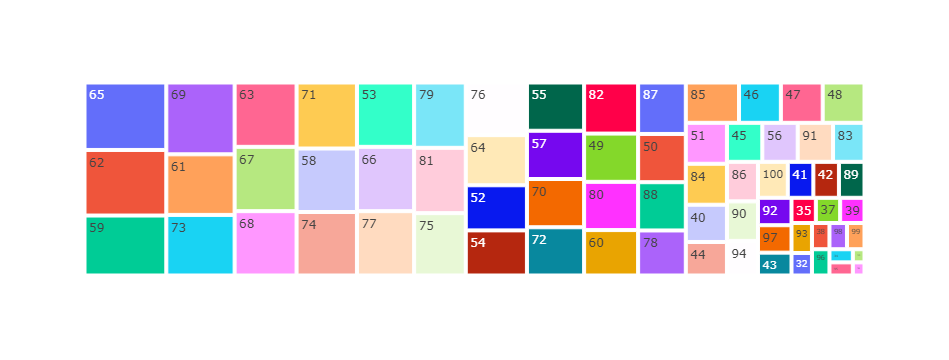

In [29]:
fig = px.treemap(df, path=['math score'])
fig.show()

In [30]:
# Գծապատկերում պատկերված է մաթեմատիկայի գնահատականը, որքան բարձր է գնահատականը այնքան ավելի մեծ է իր կշիռը ընդհանուր գծապատկերում

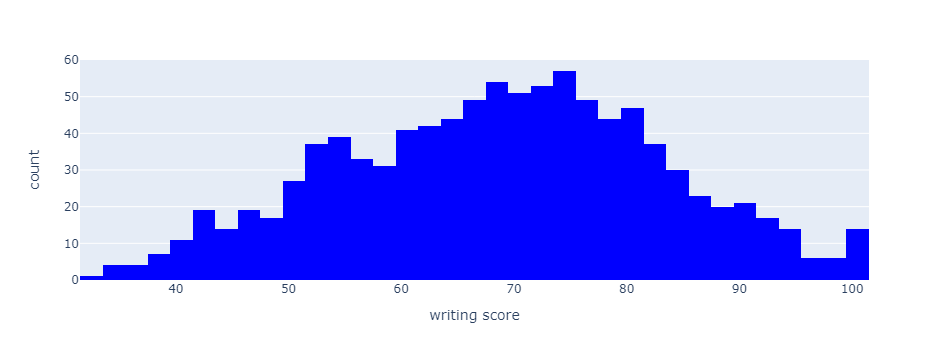

In [31]:
fig = px.histogram(df, x='writing score', 
                   color_discrete_sequence=['blue'])

# Update layout to center the title
fig.update_layout(title='', title_font=dict(size=20), title_x=0.5)



fig.show()

In [32]:
#Գծապակերում writing score է ներկայացված ըստ միջակայքերի։ Ամենաշատը ուսանողները 74-75 են ստացել գնահատականը 57 ուսանող ստացել է
# Ամենաբարձր գնահատականները 100-101 են , որը 14 ուսանող ստացել է